# 다항 회귀 (Polynomial Regression)



### 공부 시간에 따른 시험 점수 (우등생)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
dataset = pd.read_csv('./data/ScikitLearn/PolynomialRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [31]:
dataset.head()

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6


## 3-1 단순 선형 회귀 적용

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

### 전체 데이터 시각화

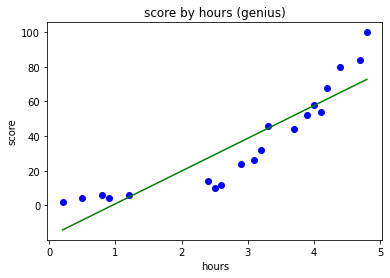

In [33]:
plt.scatter(X,y,color='blue')
plt.plot(X,reg.predict(X),color='green')
plt.title('score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

## 3-2 다항 회귀

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # 2차 다항식
X_poly = poly_reg.fit_transform(X)
X_poly

## 아래에서 3개로 확장된것을 볼 수 있는데,
## 각각 0승 1승 2승을 나타낸것임을 알 수 있다.

array([[1.000000e+00, 2.000000e-01, 4.000000e-02, 8.000000e-03,
        1.600000e-03],
       [1.000000e+00, 5.000000e-01, 2.500000e-01, 1.250000e-01,
        6.250000e-02],
       [1.000000e+00, 8.000000e-01, 6.400000e-01, 5.120000e-01,
        4.096000e-01],
       [1.000000e+00, 9.000000e-01, 8.100000e-01, 7.290000e-01,
        6.561000e-01],
       [1.000000e+00, 1.200000e+00, 1.440000e+00, 1.728000e+00,
        2.073600e+00],
       [1.000000e+00, 2.400000e+00, 5.760000e+00, 1.382400e+01,
        3.317760e+01],
       [1.000000e+00, 2.500000e+00, 6.250000e+00, 1.562500e+01,
        3.906250e+01],
       [1.000000e+00, 2.600000e+00, 6.760000e+00, 1.757600e+01,
        4.569760e+01],
       [1.000000e+00, 2.900000e+00, 8.410000e+00, 2.438900e+01,
        7.072810e+01],
       [1.000000e+00, 3.100000e+00, 9.610000e+00, 2.979100e+01,
        9.235210e+01],
       [1.000000e+00, 3.200000e+00, 1.024000e+01, 3.276800e+01,
        1.048576e+02],
       [1.000000e+00, 3.300000e+00, 1.08900

In [35]:

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)# 변환된 x,y로 모델 생성 및 학습

LinearRegression()

### 변환된 데이터 시각화

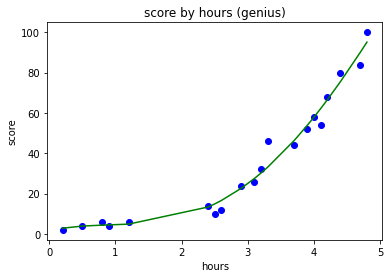

In [36]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color='green')
plt.title('score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [37]:
X_range=np.arange(min(X),max(X),0.1) # X의 최소 ~ 최대의 값을 0.1단위로 나눔
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [38]:
# 데이터의 형태를 기존 X와 같게 만들기
X_range = X_range.reshape(-1,1) # 행의 개수는 자동(-1)으로, 열 개수는 1개로
X_range

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7]])

### 그래프 부드럽게 바꾸기

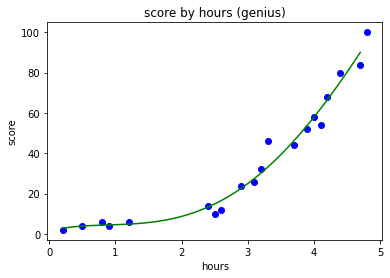

In [39]:
plt.scatter(X,y,color='blue')
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)),color='green')
plt.title('score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [40]:
reg.predict([[2]]) # 2 시간 공부 했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [42]:
### x값을 변환해서 넣어줘야함 (poly_reg.fit_transform())
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2 시간을 공부 했을 때 다항 회귀 모델의 예측

array([8.70559135])

In [43]:
lin_reg.score(X_poly,y)

0.9782775579000046